<Center><H1>Credit Card Fraud Detection </Center></H1> 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for heatmap plot
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
#import os
#print(os.listdir("../input"))
CCData = pd.read_csv("../input/creditcard.csv")
CCData.shape
# Any results you write to the current directory are saved as output.

(284807, 31)

In [2]:
CCData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Data Preparation
As the data is generated by PCA not performing any other data Preparation Steps.

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [3]:
#Time column is not necessary so removing it form the data
from sklearn.preprocessing import StandardScaler
#CCData['Amount'].head()
CCData['NormAmount'] = StandardScaler().fit_transform(CCData['Amount'].values.reshape(-1, 1))
CCData = CCData.drop(['Time','Amount'],axis=1)
CCData.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


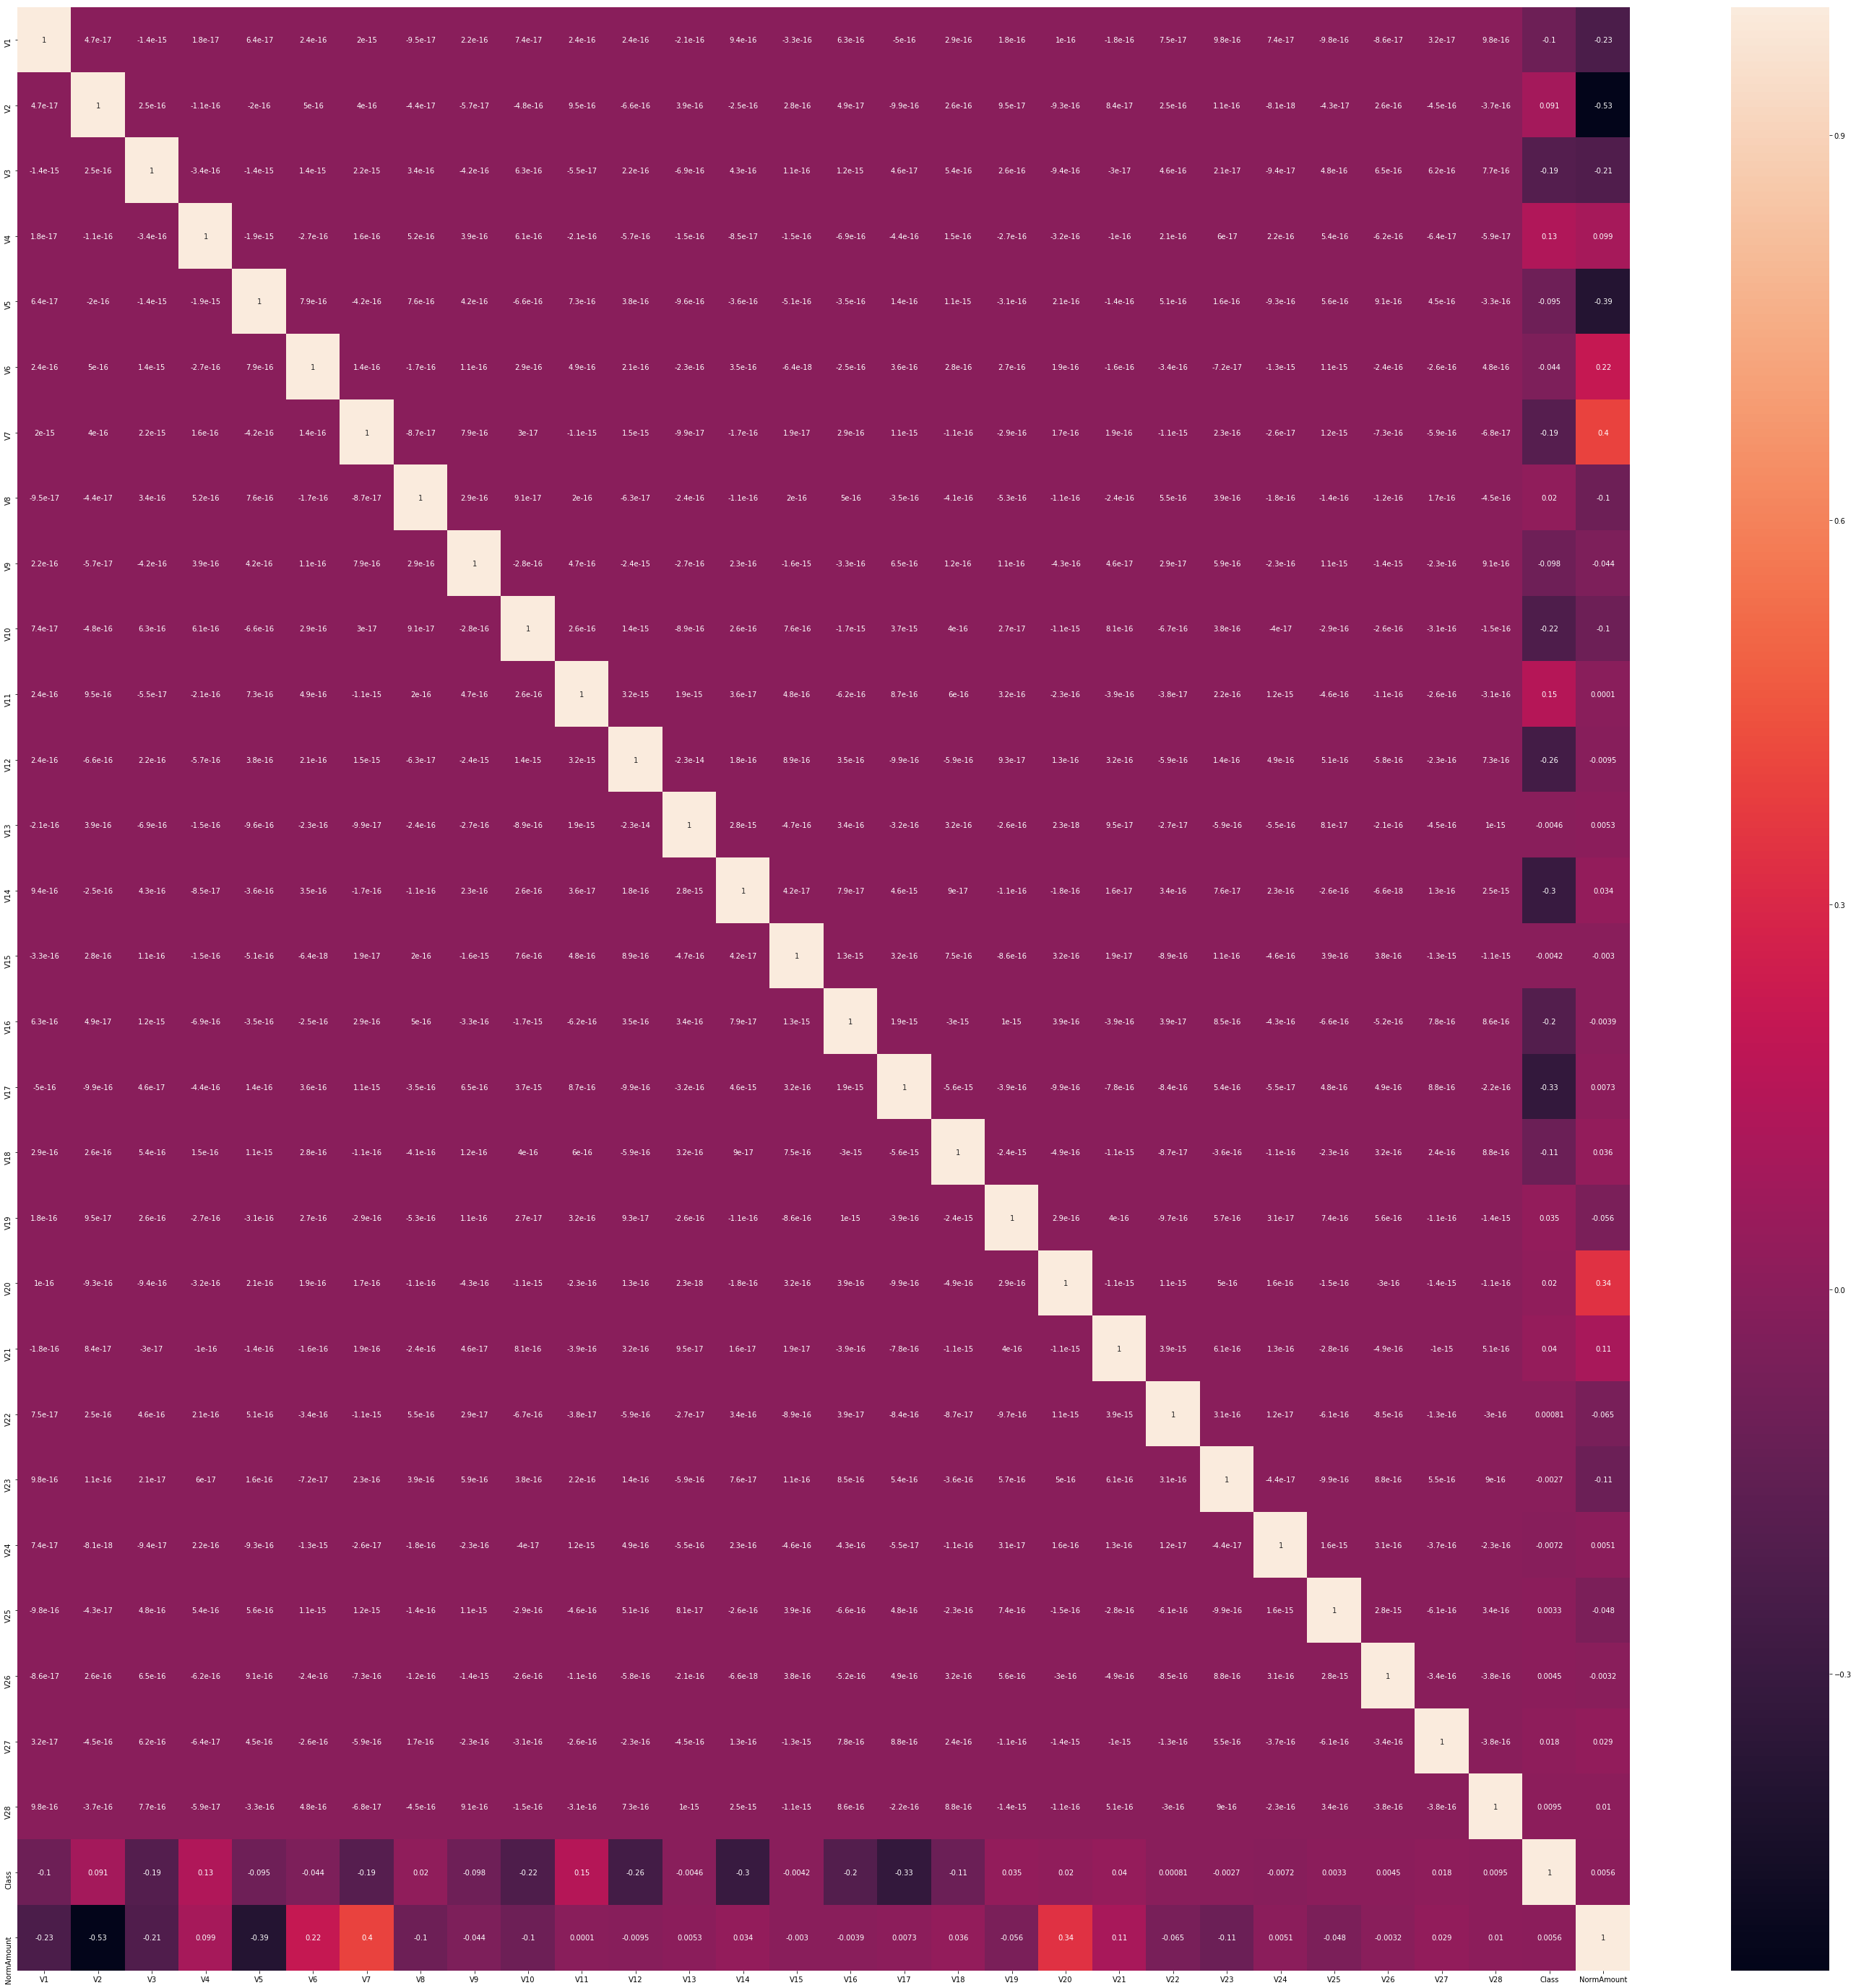

In [4]:
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(CCData.corr(),annot = True)

As the data has been derived from PCA, Very less Co-relation exists between features

Text(0,0.5,'Frequency')

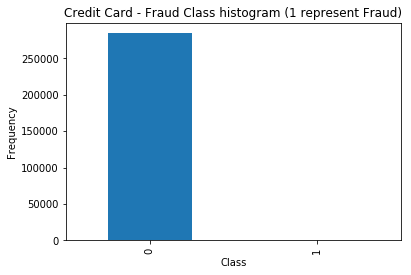

In [5]:
# plotting a histogram to identify the frequency of each type in class
count_classes = pd.value_counts(CCData['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Credit Card - Fraud Class histogram (1 represent Fraud)")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
# Showing ratio
print("Percentage of normal transactions: ", (len(CCData[CCData.Class == 0])/len(CCData))*100)
print("Percentage of fraud transactions: ", (len(CCData[CCData.Class == 1])/len(CCData))*100)
print("Total number of transactions in sampled data: ", len(CCData))

Percentage of normal transactions:  99.82725143693798
Percentage of fraud transactions:  0.1727485630620034
Total number of transactions in sampled data:  284807


### From the above graph and percentage it is clear that Non Fraud data points are consierably huge when compared to Fraud datapoints. So we need to redistribute the sample in such 50-50 Fraud & non Fraud dataset.

## **SMOTE (Synthetic Minority Over-sampling Technique)**
SMOTE is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class. SMOTE does this by selecting similar records and altering that record one column at a time by a random amount within the difference to the neighbouring records.
#### if you fail to import imblearn please run following command here - !pip install imblearn

#### Before Applying SMOTE, breaking the whole dataframe into Test and Train and the apply SMOTE on Train Data

In [7]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = CCData.drop(['Class'],axis=1)
# Putting response variable to y
y = CCData['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


In [8]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormAmount
7610,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,-0.528215,3.021936,-0.953080,2.523534,1.642896,0.223514,-0.059052,0.630296,-0.664479,-0.614659,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,-0.352190
190214,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,0.229607,0.610062,1.214313,0.521753,0.351972,-0.676072,0.208449,-0.738125,-0.275378,0.612126,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,-0.348072
130590,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,1.451927,-0.311041,-1.048697,0.620637,-0.406962,1.014342,0.189104,-0.129896,0.835635,-0.120798,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,-0.065407
247916,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,-0.539202,-0.183169,0.161022,0.112076,-1.092514,-0.231143,0.111046,0.566802,-0.491726,-0.501441,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,-0.349671
55518,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,0.066642,1.635221,0.595421,-0.843761,0.467763,0.944421,0.460752,-0.391411,-0.042388,-0.463772,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,-0.329281


In [9]:
# if you fail to import imblearn please run following command here -!pip install imblearn

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Using TensorFlow backend.


Before OverSampling, counts of label '1': 350
Before OverSampling, counts of label '0': 199014 

After OverSampling, the shape of train_X: (398028, 29)
After OverSampling, the shape of train_y: (398028,) 

After OverSampling, counts of label '1': 199014
After OverSampling, counts of label '0': 199014


In [10]:
X_train_res

array([[ 1.16048472,  0.01065279,  0.73192058, ..., -0.06198953,
        -0.01237215, -0.35218989],
       [ 2.05423661, -0.07867845, -1.23316085, ..., -0.07207854,
        -0.07404421, -0.34807186],
       [ 1.43451694, -1.56017255, -0.78396837, ...,  0.04730623,
         0.0312182 , -0.06540717],
       ...,
       [ 0.45444865,  2.48042009, -5.64903731, ...,  0.7444444 ,
         0.17414004, -0.34923131],
       [-1.5158845 , -0.03487263, -4.03738783, ...,  0.02665007,
         0.01587503,  3.58766302],
       [-3.87964473, -5.12307495, -5.83233771, ...,  0.410404  ,
        -0.38924547,  2.65845934]])

### Converting resulted numpy arrays into dataframes with header info

In [11]:
X_train_df=pd.DataFrame(X_train_res,columns=X_train.columns)
X_train_df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormAmount
0,1.160485,0.010653,0.731921,-0.083757,-0.204162,0.309873,-0.503116,0.130077,1.279474,-0.528215,3.021936,-0.953080,2.523534,1.642896,0.223514,-0.059052,0.630296,-0.664479,-0.614659,-0.109200,-0.167768,-0.142183,0.148065,-0.261307,-0.052688,0.904879,-0.061990,-0.012372,-0.352190
1,2.054237,-0.078678,-1.233161,0.183785,0.187539,-0.605905,0.102048,-0.183363,0.245017,0.229607,0.610062,1.214313,0.521753,0.351972,-0.676072,0.208449,-0.738125,-0.275378,0.612126,-0.169517,-0.263893,-0.636424,0.263862,-0.480128,-0.249245,0.206509,-0.072079,-0.074044,-0.348072
2,1.434517,-1.560173,-0.783968,-2.432927,0.578638,3.528638,-1.814737,0.859190,-1.680052,1.451927,-0.311041,-1.048697,0.620637,-0.406962,1.014342,0.189104,-0.129896,0.835635,-0.120798,-0.068984,-0.020924,0.089320,-0.120671,1.009913,0.510411,-0.038200,0.047306,0.031218,-0.065407
3,-0.112311,1.235492,-0.312905,-0.502613,0.699869,-1.028247,0.964615,-0.112966,0.082123,-0.539202,-0.183169,0.161022,0.112076,-1.092514,-0.231143,0.111046,0.566802,-0.491726,-0.501441,0.135098,-0.334646,-0.734681,0.161824,0.984857,-0.439226,0.093359,0.332998,0.149541,-0.349671
4,1.123477,-0.093882,0.988880,0.533433,-0.769281,-0.068741,-0.575773,0.257399,0.235960,0.066642,1.635221,0.595421,-0.843761,0.467763,0.944421,0.460752,-0.391411,-0.042388,-0.463772,-0.170440,-0.003975,-0.052800,0.145628,0.219496,0.000863,0.215796,0.000743,0.013160,-0.329281


Text(0,0.5,'Frequency')

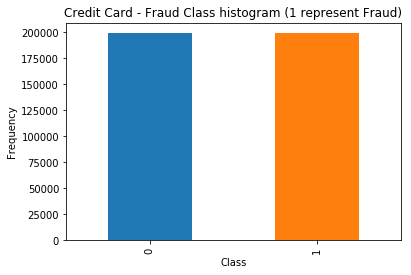

In [12]:
# plotting a histogram to identify the frequency of each type in class
count_classes = pd.value_counts(y_train_res, sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Credit Card - Fraud Class histogram (1 represent Fraud)")
plt.xlabel("Class")
plt.ylabel("Frequency")

<h2> Model Building </h2>

### Feature Selection

In [13]:
##X_train_res, y_train_res
X_train_df.shape

(398028, 29)

### As the training set contains 29 Features in it , we will perform Feature Selection using RFE to pick top 10 Features that will assist in bulding the model

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train_df,y_train_res)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[False False False  True False  True False  True False  True  True  True
  True  True False  True False False False False False False False False
 False  True False False False]
[ 6 13 12  1  7  1 14  1  3  1  1  1  1  1 16  1  2 11 17  4 19 15  8 20
 18  1  9 10  5]


In [15]:
col = X_train_df.columns[rfe.support_]
print(col)

Index(['V4', 'V6', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V26'], dtype='object')


In [16]:
UpdatedTrain_X=X_train_df[col]
print(UpdatedTrain_X.shape)
UpdatedTest_X=X_test[col]
print(UpdatedTest_X.shape)

(398028, 10)
(85443, 10)


In [17]:
import statsmodels.api as sm
df_train_rfe = sm.add_constant(UpdatedTrain_X)
log_mod_rfe = sm.GLM(y_train_res,df_train_rfe,family = sm.families.Binomial())
mod_res_rfe = log_mod_rfe.fit()
log_mod_rfe.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398028
Model:                            GLM   Df Residuals:                   398017
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 24 Feb 2019   Deviance:                          nan
Time:                        06:15:20   Pearson chi2:                 1.24e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3155      0.013   -255.034      0.000      -3.341      -3.290
V4             0.8851      0.007    134.086      0.000       0.872       0.898
V6            -0.2733      0.008    -35.514      0.000      -0.288      -0.258
V8            -0.3337      0.007    -49.156      0.000      -0.347      -0.320
V10           -0.4827      0.009    -53.339      0.000      -0.500      -0.465
V11            0.4426      0.009     51.990      0.000       0.426       0.459
V12           -0.6582      0.009    -75.600      0.000      -0.675      -0.641
V13           -0.3710      0.008    -46.130      0.000      -0.387      -0.355
V14           -0.8897      0.008   -112.717      0.000      -0.905      -0.874
V16           -0.2742      0.011    -24.891      0.000      -0.296      -0.253
V26           -0.3773      0.019    -19.403      0.000      -0.415      -0.339
==============================================================================
"""

In [18]:
#Predicting the Test Data
UpdatedTestCoef_X = sm.add_constant(UpdatedTest_X[col])
predictions = mod_res_rfe.predict(UpdatedTestCoef_X)

Obtaining Metrics from the above model

In [19]:
Y_pred= predictions.map(lambda x: 1 if x > 0.5 else 0)
Y_pred.head()

49089     0
154704    0
67247     0
251657    0
201903    1
dtype: int64

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.89      0.11       142

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [21]:
# Let us calculate 
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, Y_pred))
print("precision", metrics.precision_score(y_test,Y_pred))
print("recall", metrics.recall_score(y_test,Y_pred))
confusion=confusion_matrix(y_test,Y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[83304  1997]
 [   15   127]] 

accuracy 0.9764521376824316
precision 0.059792843691148775
recall 0.8943661971830986
Sensitivity 0.8943661971830986
Positive Predection Rate 0.059792843691148775
Negative Predection rate 0.999819969034674
False positive Predection Rate 0.02341121440545832


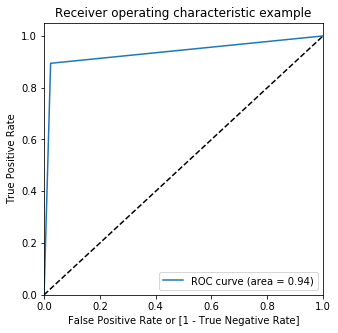

In [22]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

draw_roc(y_test, Y_pred)

## Model -2 : Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
# Create a based model
rf = RandomForestClassifier()


In [24]:
rf.fit(UpdatedTrain_X, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred=rf.predict(UpdatedTest_X)
Y_pred=pd.DataFrame(y_pred)
#Y_pred= Y_pred.map(lambda x: 1 if x > 0.5 else 0)
Y_pred.shape

(85443, 1)

In [26]:
# Let's check the report of our default model
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.69      0.82      0.75       142

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.84      0.91      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [27]:
# Let us calculate 
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, Y_pred))
print("precision", metrics.precision_score(y_test,Y_pred))
print("recall", metrics.recall_score(y_test,Y_pred))
confusion=confusion_matrix(y_test,Y_pred)    
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print("Sensitivity",TP / float(TP+FN))
# positive predictive value 
print ("Positive Predection Rate",TP / float(TP+FP))
# Negative predictive value
print ("Negative Predection rate",TN / float(TN+ FN))
# Calculate false postive rate - predicting churn when customer does not have churned
print("False positive Predection Rate",FP/ float(TN+FP))

[[85248    53]
 [   26   116]] 

accuracy 0.9990754069964772
precision 0.6863905325443787
recall 0.8169014084507042
Sensitivity 0.8169014084507042
Positive Predection Rate 0.6863905325443787
Negative Predection rate 0.9996951004995661
False positive Predection Rate 0.0006213291755079073


In [28]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = UpdatedTrain_X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [29]:
feature_importances

,importance
V14,0.389203
V12,0.163727
V11,0.144356
V4,0.111427
V10,0.090629
V8,0.023954
V16,0.022269
V26,0.020629
V13,0.017919
V6,0.015888
